# Titanic spaceship-classification challenge from kaggle

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

I will use Random Forest model using _TensorFlow Decision Forests_. 

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#I want to use tensorFlow
# machine learning toolkit developed by Google
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import tensorflow_decision_forests as tfdf
print("TensorFlow Decision Forests v" + tfdf.__version__)

# split data into a training set and a test set
from sklearn.model_selection import train_test_split

2025-08-05 11:52:42.295454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754387562.314189   57705 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754387562.319735   57705 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754387562.334002   57705 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754387562.334021   57705 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754387562.334023   57705 computation_placer.cc:177] computation placer alr

TensorFlow version: 2.19.0


TensorFlow Decision Forests v1.12.0


In [2]:
train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv') 

print("Full train dataset shape is {}".format(train_data.shape))
print("Full test dataset shape is {}".format(test_data.shape))
train_data.describe() 

Full train dataset shape is (8693, 14)
Full test dataset shape is (4277, 13)


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Analyse the dataset

#### File and Data Field Descriptions:
` train.csv` - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- __PassengerId__ - A unique Id for each passenger. Each Id takes the form *gggg_pp* where *gggg* indicates a group the passenger is travelling with and *pp* is their number within the group. People in a group are often family members, but not always.
- __HomePlanet__ - The planet the passenger departed from, typically their planet of permanent residence.
- __CryoSleep__ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- __Cabin__ - The cabin number where the passenger is staying. Takes the form *deck/num/side*, where side can be either *P* for Port or *S* for Starboard.
- __Destination__ - The planet the passenger will be debarking to.
- __Age__ - The age of the passenger.
- __VIP__ - Whether the passenger has paid for special VIP service during the voyage.
- __RoomService, FoodCourt, ShoppingMall, Spa, VRDeck__ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- __Name__ - The first and last names of the passenger.
- __Transported__ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

`test.csv` - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.


In [3]:
train_data[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Display categorical data:

In [5]:
train_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [6]:
train_data.groupby(['HomePlanet'], as_index=False)['Transported'].mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


In [7]:
train_data.groupby(['CryoSleep'], as_index=False)['Transported'].mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


In [8]:
train_data.groupby(['VIP'], as_index=False)['Transported'].mean()

,VIP,Transported
0,False,0.506332
1,True,0.381910


In [9]:
train_data.groupby(['Destination'], as_index=False)['Transported'].mean()

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


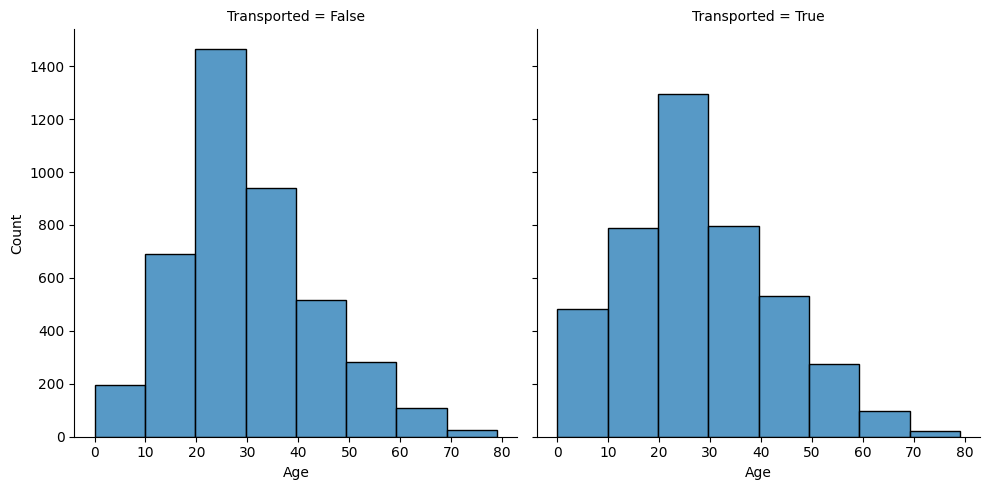

In [10]:
sb.displot(train_data, x='Age', col ='Transported', binwidth=10, height=5)

In [11]:
# def binning(train_df, test_df, original_col, cut_col):
#     """
#     Convert qcut categorical bins to numerical labels
#     """
#     # Get bin edges from training data (dropna to avoid issues)
#     _, bin_edges = pd.qcut(train_df[original_col].astype(float), 8, retbins=True, duplicates='drop')
    
#     # Apply to both datasets, assign to new column
#     train_df[cut_col] = pd.cut(train_df[original_col].astype(float), bins=bin_edges, labels=range(len(bin_edges)-1))
#     test_df[cut_col] = pd.cut(test_df[original_col].astype(float), bins=bin_edges, labels=range(len(bin_edges)-1))
    
#     # # Convert to numeric type (optional: keep as int, NaN stays as NaN)
#     # train_df[cut_col] = train_df[cut_col].astype('float')
#     # test_df[cut_col] = test_df[cut_col].astype('float')
    
#     return train_df, test_df

# # Usage
# train_data, test_data = binning(train_data, test_data, 'Age', 'AgeCut')

In [12]:
# train_data.groupby(['AgeCut'], as_index=False)['Transported'].mean()

In [13]:
train_data['Age'].isna().sum()

179

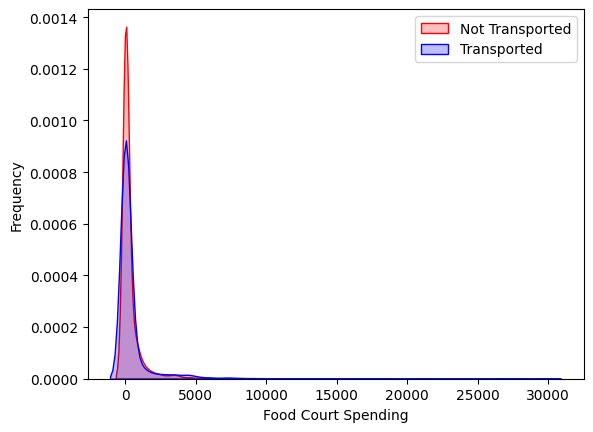

In [14]:
g = sb.kdeplot(train_data['FoodCourt'][(train_data['Transported'] == 0) & (train_data['FoodCourt'].notnull())], color='red', fill = True)
g = sb.kdeplot(train_data['FoodCourt'][(train_data['Transported'] == 1) & (train_data['FoodCourt'].notnull())], ax = g, color = 'blue', fill = True)

g.set_xlabel('Food Court Spending')
g.set_ylabel('Frequency')
g = g.legend(['Not Transported', 'Transported'])

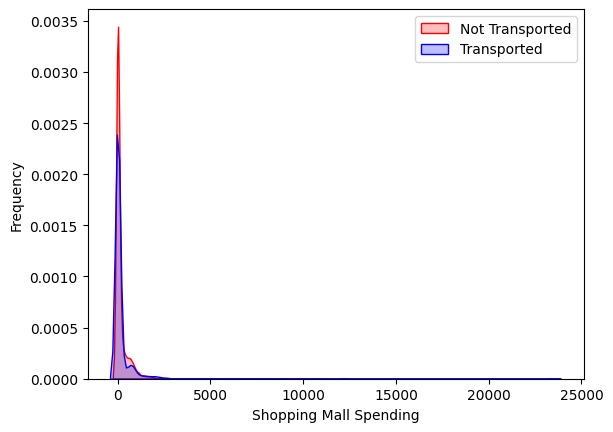

In [15]:
g = sb.kdeplot(train_data['ShoppingMall'][(train_data['Transported'] == 0) & (train_data['ShoppingMall'].notnull())], color='red', fill = True)
g = sb.kdeplot(train_data['ShoppingMall'][(train_data['Transported'] == 1) & (train_data['ShoppingMall'].notnull())], ax = g, color = 'blue', fill = True)

g.set_xlabel('Shopping Mall Spending')
g.set_ylabel('Frequency')
g = g.legend(['Not Transported', 'Transported'])

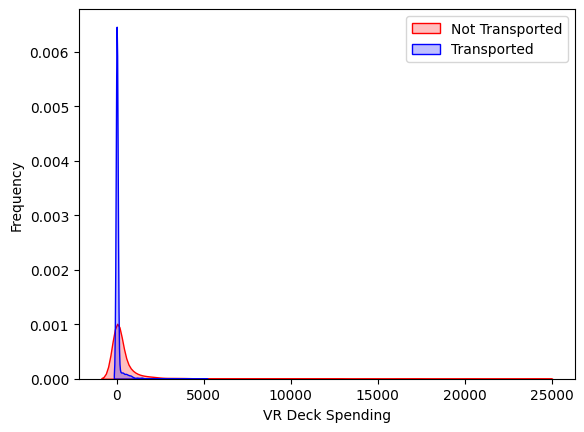

In [16]:
g = sb.kdeplot(train_data['VRDeck'][(train_data['Transported'] == 0) & (train_data['VRDeck'].notnull())], color='red', fill = True)
g = sb.kdeplot(train_data['VRDeck'][(train_data['Transported'] == 1) & (train_data['VRDeck'].notnull())], ax = g, color = 'blue', fill = True)

g.set_xlabel('VR Deck Spending')
g.set_ylabel('Frequency')
g = g.legend(['Not Transported', 'Transported'])

In [17]:
train_data['LuxuryExpenses'] = train_data['RoomService'] + train_data['Spa'] + train_data['VRDeck']
test_data['LuxuryExpenses'] = test_data['RoomService'] + test_data['Spa'] + test_data['VRDeck']

In [18]:
train_data['Expenses'] = train_data['FoodCourt'] + train_data['ShoppingMall']
test_data['Expenses'] = test_data['FoodCourt'] + test_data['ShoppingMall']

In [19]:
train_data[:5]  

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LuxuryExpenses,Expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,702.0,34.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,6807.0,3576.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3522.0,1654.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,870.0,221.0


In [20]:
train_data['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

The value of column Cabin is a string with the format _Deck/Cabin_num/Side_. Here we will split the Cabin column and create 3 new columns _Deck, Cabin_num and Side_, since it will be easier to train the model on those individual data.


In [21]:
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)

In [22]:
try:
    train_data = train_data.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

## Clean up and encoding data

This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required.

But this dataset also has boolean fields with missing values. TF-DF doesn't support boolean fields yet. So we need to convert those fields into int. To account for the missing values in the boolean fields, we will replace them with zero.

In [23]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'LuxuryExpenses', 'Expenses', 'Deck', 'Cabin_num',
       'Side'],
      dtype='object')

In [24]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Destination     8511 non-null   object 
 4   Age             8514 non-null   float64
 5   VIP             8490 non-null   object 
 6   RoomService     8512 non-null   float64
 7   FoodCourt       8510 non-null   float64
 8   ShoppingMall    8485 non-null   float64
 9   Spa             8510 non-null   float64
 10  VRDeck          8505 non-null   float64
 11  Name            8493 non-null   object 
 12  Transported     8693 non-null   bool   
 13  LuxuryExpenses  8149 non-null   float64
 14  Expenses        8304 non-null   float64
 15  Deck            8494 non-null   object 
 16  Cabin_num       8494 non-null   object 
 17  Side            8494 non-null   o

TF-DF cannot handle boolean columns, so we have to adjust the labels in the Transported to convert them into the integer format that TF-DF expects.

In [25]:
train_data['Transported'] = train_data['Transported'].astype(int)

In [26]:
train_data[['VIP', 'CryoSleep']] = train_data[['VIP', 'CryoSleep']].fillna(value=0)
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

In [27]:
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data['VIP'] = test_data['VIP'].astype(int)

In [28]:
train_data[['Age','LuxuryExpenses','Expenses']].fillna(train_data[['Age','LuxuryExpenses','Expenses']].mean())
test_data[['Age','LuxuryExpenses','Expenses']].fillna(test_data[['Age','LuxuryExpenses','Expenses']].mean())

train_data.isnull().sum().sort_values(ascending=False)


LuxuryExpenses    544
Expenses          389
ShoppingMall      208
HomePlanet        201
Name              200
Side              199
Cabin_num         199
Deck              199
VRDeck            188
Spa               183
FoodCourt         183
Destination       182
RoomService       181
Age               179
Transported         0
VIP                 0
CryoSleep           0
PassengerId         0
dtype: int64

In [29]:
train_data = train_data.drop(['PassengerId', 'Name', 'Spa','FoodCourt','VRDeck','RoomService'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Spa','FoodCourt','VRDeck','RoomService'], axis=1)


## Train, validation, and test sets
We shall adhere to the definitions given here https://machinelearningmastery.com/difference-test-validation-datasets/):
   
  * __Training Dataset__: The sample of data used to fit the model.
  * __Validation Dataset__: The sample of data used to decide 1) whether the fit is reasonable (e.g., the model has not been overfitted), 2) decide which of several models is the best and 3) tune model hyperparameters.
  * __Test Dataset__: The sample of data used to provide an unbiased evaluation of the fitted model.

The validation set will be some small fraction of the training set and will be used to decide when to stop the training.

## Prepare data
  1. Split training data into two parts: one for fitting and one for validation.
  1. Apply a linear transformation to data so that each feature has zero mean, unit variance.

In [42]:
# Split the training data into a part for fitting and
# a part for validation during training.
fraction = 1/5
train_data, valid_data = train_test_split(train_data, 
                                          test_size=fraction)

# reset the indices in the dataframes (and drop the old ones)
# so that the indices start from zero and increment by one
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)
test_data  = test_data.reset_index(drop=True)

print('train set size:        %6d' % train_data.shape[0])
print('validation set size:   %6d' % valid_data.shape[0])
print('test set size:         %6d' % test_data.shape[0])

train set size:          6258
validation set size:     1565
test set size:           4277


There's one more step required before we can train the model. We need to convert the datatset from Pandas format (`pd.DataFrame`) into TensorFlow Datasets format (`tf.data.Dataset`).

TensorFlow Datasets is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.

In [43]:
train_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='Transported')
valid_data_tf = tfdf.keras.pd_dataframe_to_tf_dataset(valid_data, label='Transported')

## Select a Model

There are several tree-based models for you to choose from.

- RandomForestModel
- GradientBoostedTreesModel
- CartModel
- DistributedGradientBoostedTreesModel

In [26]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

We will use the defaults to create the Random Forest Model. By default the model is set to train for a classification task.

In [27]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmpdll6wg53 as temporary training directory


## Train the model

In [28]:
rf.fit(x=train_data_tf)

Reading training dataset...
Training dataset read in 0:00:03.061199. Found 7823 examples.
Training model...


I0000 00:00:1754386188.203501   55965 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1754386188.203528   55965 kernel.cc:783] Collect training examples
I0000 00:00:1754386188.203535   55965 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1754386188.203846   55965 kernel.cc:401] Number of batches: 8
I0000 00:00:1754386188.203857   55965 kernel.cc:402] Number of examples: 7823
I0000 00:00:1754386188.205671   55965 data_spec_inference.cc:354] 1228 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Cabin_num (550 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:

Model trained in 0:00:23.964039
Compiling model...


I0000 00:00:1754386212.053395   55965 decision_forest.cc:808] Model loaded with 300 root(s), 246380 node(s), and 11 input feature(s).
I0000 00:00:1754386212.056585   55965 abstract_model.cc:1439] Engine "RandomForestGeneric" built
2025-08-05 11:30:12.056623: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


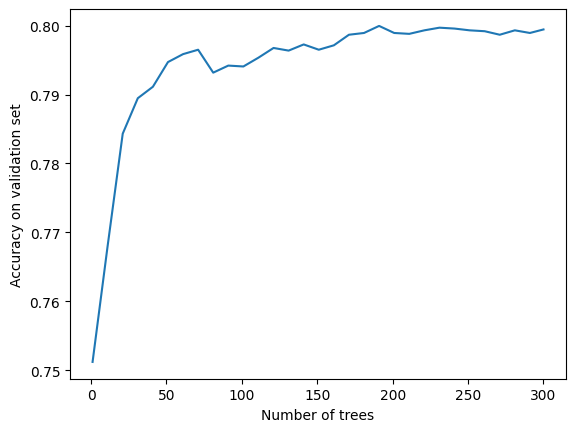

In [32]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy on validation set")
plt.show()

In [33]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=7823, accuracy=0.799437555924837, loss=0.5423157228781099, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [41]:
evaluation = rf.evaluate(x=valid_data_tf, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 151ms/step - loss: 0.0000e+00 - accuracy: 0.8069
loss: 0.0000
accuracy: 0.8069


In [39]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


In [40]:
inspector.variable_importances()["NUM_AS_ROOT"]


[("LuxuryExpenses" (1; #7), 138.0),
 ("CryoSleep" (1; #2), 87.0),
 ("Expenses" (1; #5), 45.0),
 ("ShoppingMall" (1; #8), 22.0),
 ("Deck" (4; #3), 3.0),
 ("HomePlanet" (4; #6), 3.0),
 ("Age" (1; #0), 2.0)]